# COMPUTER DATA DATASET
Using the above dataset to build a Model using  Linear Regression to predict the price of computer. 

## BUSINESS OBJECTIVE
* Maximize profit
* Minimize defective products
* Maximize Sales
* Maximize productivity
* Maximize Customer trust

## CONSTRAINTS
* Supply Chain limitations
* Logistics delay 
* Availability of components. 

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | Unnamed: 0 | This is the index column        | Ratio    | Irrelevant    |
| 2 | price | Price of the computer                | Ratio    | Relevant      |
| 3 | speed | Processing speed of the computer     | Ratio    | Relevant      |
| 4 | hd | Hard Drive space in the computer        | Ratio    | Relevant      |
| 5 | ram  | The memory of the computer            | Ratio    | Relevant      |
| 6 | screen | The screen size of the computers    | Ratio    | Relevant      |
| 7 | cd  | Whether CD drive is present: yes or no | Nominal  | Relevant      |
| 8 | multi | Whether multiprocessor: Yes or No    | Nominal  | Relevant      |
| 9 | premium | Whether premium: Yes or No         | Nominal  | Relevant      |
| 10 | ads | May be number of advertisements       | Ratio    | Relevant      |
| 11 | trend | May be the number in which it is trending| Ratio    | Relevant      |


Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass22\Computer_Data.csv")
df=df0.copy()
df.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(6259, 11)

In [4]:
df.dtypes

Unnamed: 0     int64
price          int64
speed          int64
hd             int64
ram            int64
screen         int64
cd            object
multi         object
premium       object
ads            int64
trend          int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
screen        0
cd            0
multi         0
premium       0
ads           0
trend         0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Unnamed: 0    6259
price          808
speed            6
hd              59
ram              6
screen           3
cd               2
multi            2
premium          2
ads             34
trend           35
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_17584\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Unnamed: 0    3130.000000
price         2219.576610
speed           52.011024
hd             416.601694
ram              8.286947
screen          14.608723
ads            221.301007
trend           15.926985
dtype: float64

In [11]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_17584\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Unnamed: 0    3130.0
price         2144.0
speed           50.0
hd             340.0
ram              8.0
screen          14.0
ads            246.0
trend           16.0
dtype: float64

In [12]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_17584\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_17584\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([[1, 1999, 33, 340, 8, 14, 'no', 'no', 'yes', 339, 17]],
      dtype=object), count=array([[   1,  103, 2033,  764, 2320, 3661, 3351, 5386, 5647,  339,  339]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_17584\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Unnamed: 0    3.265112e+06
price         3.373332e+05
speed         4.476498e+02
hd            6.684730e+04
ram           3.170928e+01
screen        8.192336e-01
ads           5.600320e+03
trend         6.199962e+01
dtype: float64

In [14]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_17584\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Unnamed: 0    1806.961999
price          580.803956
speed           21.157735
hd             258.548445
ram              5.631099
screen           0.905115
ads             74.835284
trend            7.873984
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [15]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_17584\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0    0.000000
price         0.711725
speed         0.657008
hd            1.378019
ram           1.386202
screen        1.634008
ads          -0.553328
trend         0.236669
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [16]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_17584\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Unnamed: 0   -1.200000
price         0.730417
speed        -0.275453
hd            2.452456
ram           1.462250
screen        1.851825
ads          -0.539843
trend        -0.674134
dtype: float64

### GRAPHICAL REPRESENTATION

Understanding the relation between price and trend using the scatterplot. 

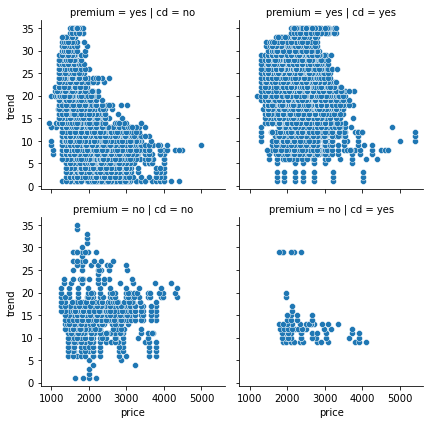

In [17]:
g = sns.FacetGrid(df, col="cd",  row="premium")
g.map_dataframe(sns.scatterplot, "price", "trend")
g.add_legend()

From the below plot we can see that the premium models are in majority in the dataset. 

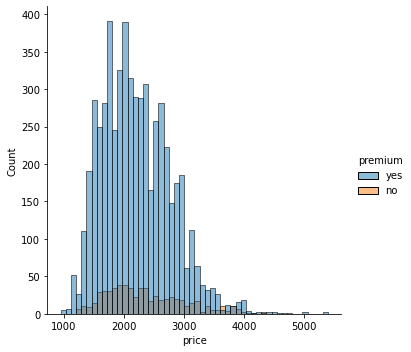

In [18]:
sns.displot(df, x="price", hue="premium")

From the below plots we can see that ram with 4GB & 8GB are the most sold when compared to others.

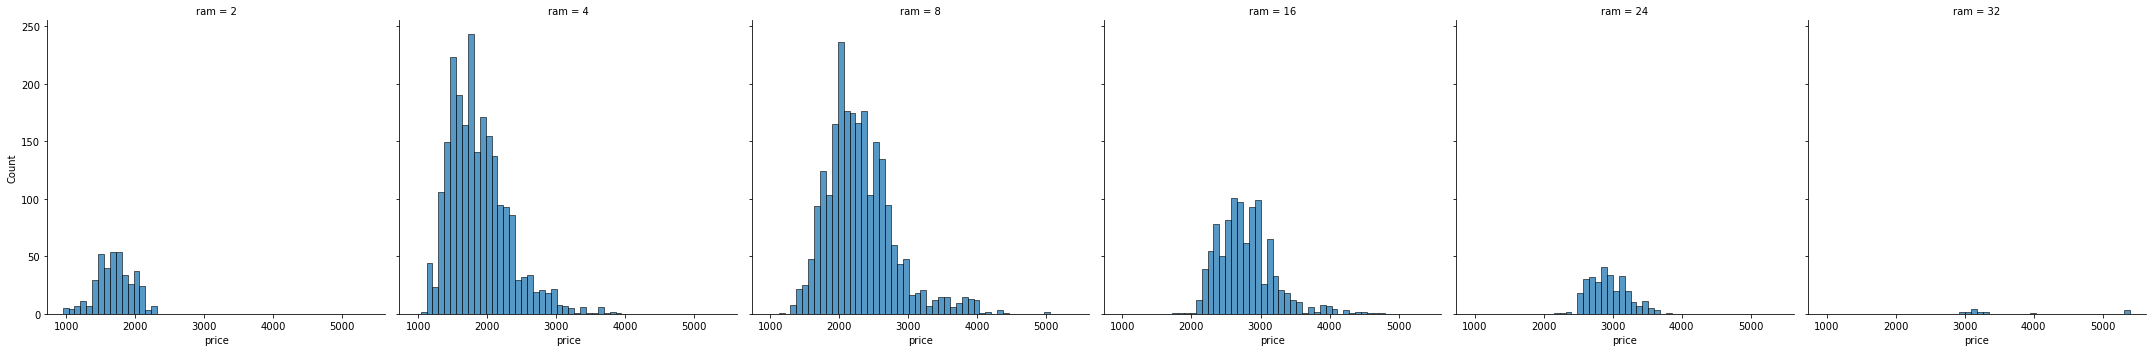

In [19]:
sns.displot(df, x="price", col="ram")

The countplot confirms the above plot. 

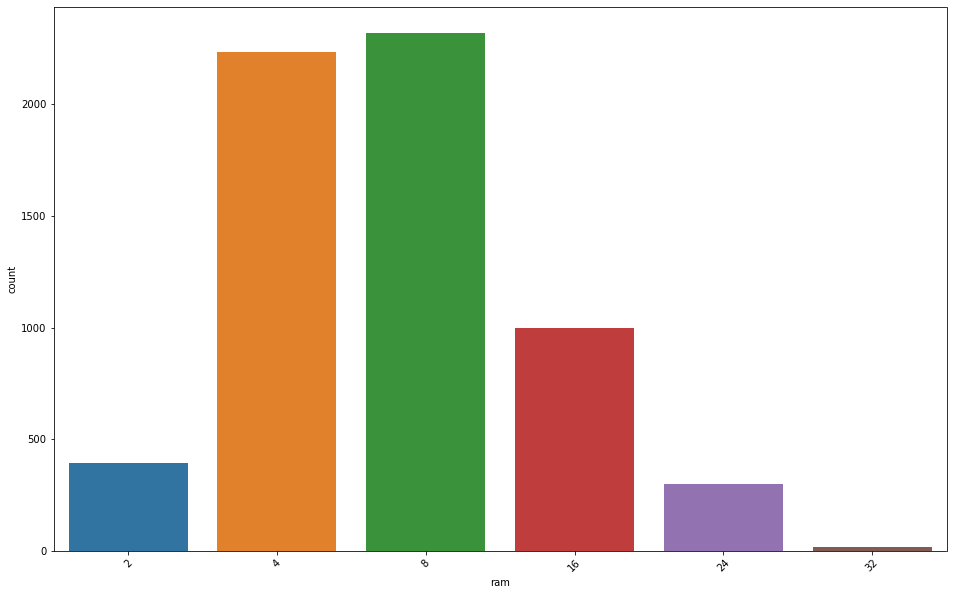

In [20]:
plt.figure(1, figsize=(16, 10))
sns.countplot(x=df["ram"])
plt.xticks(rotation = 45)
plt.show()

From the countplot we can see that 14 inch screens are the most sold computers followed by 15 and 17 inch screens. 

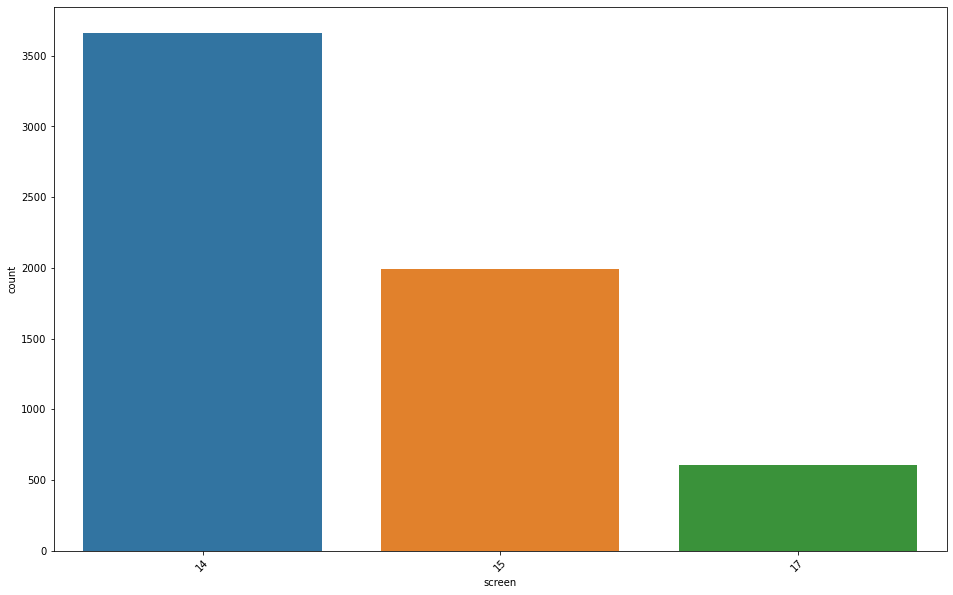

In [21]:
plt.figure(1, figsize=(16, 10))
sns.countplot(x=df["screen"])
plt.xticks(rotation = 45)
plt.show()

Using the QQ-plot to understand the distribution of the label variable. We can see that the distribution is quite normal with right skewness

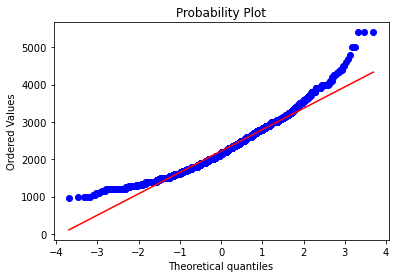

In [22]:
from scipy import stats
import pylab
stats.probplot(df['price'], dist = "norm", plot = pylab)
plt.show()

Plotting boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

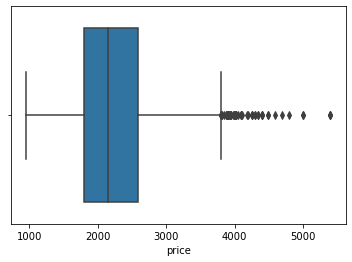

In [23]:
sns.boxplot(df["price"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speed'>

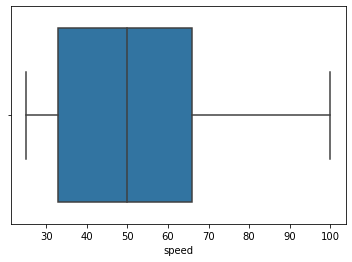

In [24]:
sns.boxplot(df['speed'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hd'>

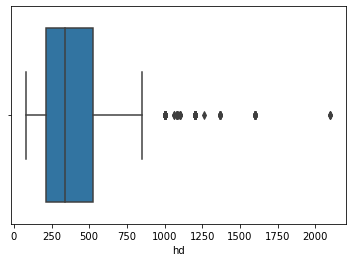

In [25]:
sns.boxplot(df['hd'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ads'>

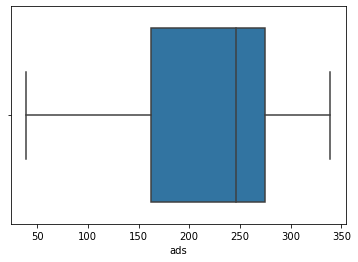

In [26]:
sns.boxplot(df['ads'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trend'>

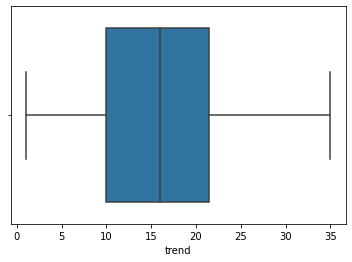

In [27]:
sns.boxplot(df['trend'])

From the boxplots it is very evident that there are outliers in the dataset so using the below custom function calculated the number of outliers in each variable.

In [28]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [29]:
sum(outlier_func(df["price"]))

75

In [30]:
sum(outlier_func(df['hd']))

489

In [31]:
from feature_engine.outliers import Winsorizer

In [32]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['price'])

df['price']= winsor.fit_transform(df[['price']])
sum(outlier_func(df['price']))

0

In [33]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['hd'])

df['hd']= winsor.fit_transform(df[['hd']])
sum(outlier_func(df['hd']))

0

__CORRELATION CHART__

<AxesSubplot:>

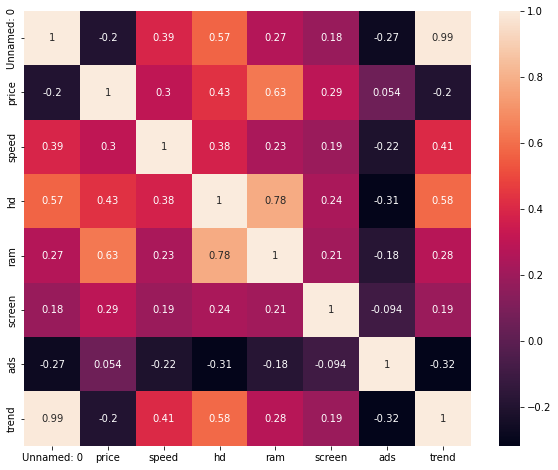

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

from the correlation chart we can see that the correlation strength is moderate to low with the dependent variable 'price', with ram having an above moderate strength. 

__ONE HOT ENCODING__<br>
Using the pandas function of get_dummies to get the one hot encoded values of the categorical variables. 

In [35]:
df_enc=df.drop(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen','ads', 'trend'],axis=1,)
df_enc = pd.get_dummies(df_enc, columns = [ 'cd', 'multi','premium'],drop_first=True)
df_enc.head()

,cd_yes,multi_yes,premium_yes
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,1


Joining the one hot encoded columns to the original dataset to form a new dataset. 

In [36]:
df_new=df.join(df_enc)
df_new.drop([ 'cd', 'multi','premium','Unnamed: 0'],axis=1,inplace=True)
df_new.head()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1499.0,25,80.0,4,14,94,1,0,0,1
1,1795.0,33,85.0,2,14,94,1,0,0,1
2,1595.0,25,170.0,4,15,94,1,0,0,1
3,1849.0,25,170.0,8,14,94,1,0,0,0
4,3295.0,33,340.0,16,14,94,1,0,0,1


<AxesSubplot:>

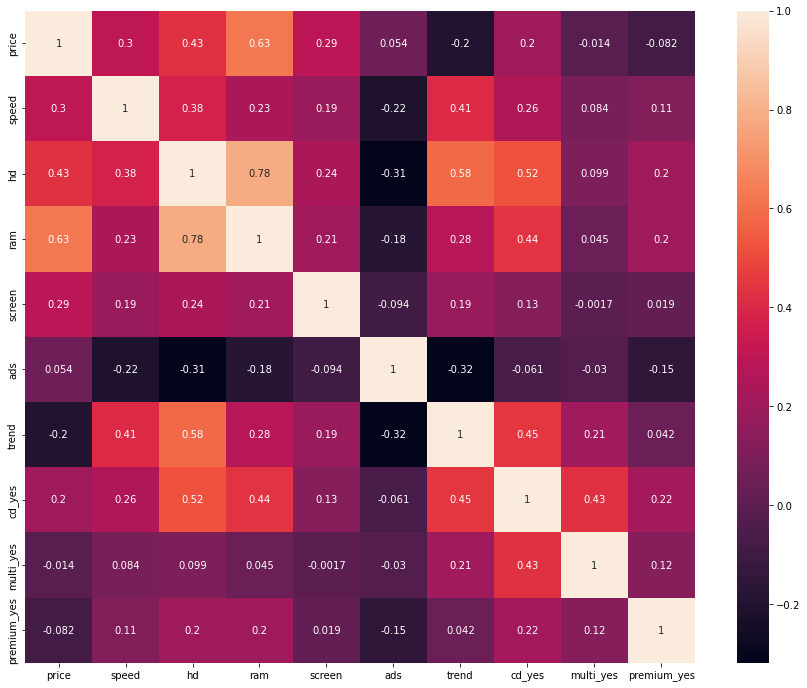

In [37]:
plt.figure(figsize=(15,12))
sns.heatmap(df_new.corr(),annot=True)

Again checking the correlation chart to understand the relation between the one hot encoded values and the other variables. 

#### MODEL BUILDING

Importing the library required for building the model. 

In [38]:
import statsmodels.formula.api as smf

Fitting the model

In [39]:
model = smf.ols('price ~ speed+hd +ram+screen +ads + trend + cd_yes + multi_yes+ premium_yes', data = df_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     2520.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:29:33   Log-Likelihood:                -43771.
No. Observations:                6259   AIC:                         8.756e+04
Df Residuals:                    6249   BIC:                         8.763e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     395.2912     57.830      6.835      0.000     281.925     508.657
speed           9.1626      0.177     51.665      0.000       8.815       9.510
hd              0.8385      0.029     29.096      0.000       0.782       0.895
ram            47.3687      1.026     46.164      0.000      45.357      49.380
screen        116.4663      3.833     30.388      0.000     108.953     123.980
ads             0.6176      0.049     12.601      0.000       0.522       0.714
trend         -51.0711      0.607    -84.193      0.000     -52.260     -49.882
cd_yes         51.1200      9.159      5.581      0.000      33.165      69.075
multi_yes     108.4279     10.943      9.909      0.000      86.976     129.880
premium_yes  -506.9508     11.834    -42.838      0.000    -530.150    -483.752
==============================================================================
Omnibus:                      546.595   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1156.708
Skew:                           0.565   Prob(JB):                    6.67e-252
Kurtosis:                       4.778   Cond. No.                     8.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The values we are concerned with are -<br>

* __R-squared/Ajusted R-squared__<br>
    R-squared value is 0.784. This shows that 78% of the variance in the dependent variable  can be explained by remaining relevant columns.<br>
* __F statistic  p value and its significance__<br>
    F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.<br>
* __The coefficients and significance (p-values)__<br>
    The coefficients of the independent variables have a very low p-value closer to zero which means they are statistically significant.<br>

From the above values we can say that the fit is significant.<br>

__Checking for multicolinearity using VIF values, so that the multicolinear variables can be removed.__<br>
Note: Assumption- VIF > 10 = colinearity<br>
calculating VIF's values of independent variables

In [40]:
rsq_s = smf.ols('speed ~ hd +ram+screen +ads + trend + cd_yes + multi_yes+ premium_yes', data = df_new).fit().rsquared  
vif_s = 1/(1 - rsq_s) 

In [41]:
rsq_hd = smf.ols('hd  ~  speed+ram+screen +ads + trend + cd_yes + multi_yes+ premium_yes  ', data = df_new).fit().rsquared  
vif_hd = 1/(1 - rsq_hd) 

In [42]:
rsq_c = smf.ols('ram ~  speed+hd +screen +ads + trend + cd_yes + multi_yes+ premium_yes  ', data = df_new).fit().rsquared  
vif_c = 1/(1 - rsq_c) 

In [43]:
rsq_sc = smf.ols('screen ~  speed+hd +ram+ ads + trend + cd_yes + multi_yes+ premium_yes  ', data = df_new).fit().rsquared  
vif_sc = 1/(1 - rsq_sc) 

In [44]:
rsq_ad = smf.ols('ads ~ speed+hd +ram+screen + trend + cd_yes + multi_yes+ premium_yes  ', data = df_new).fit().rsquared  
vif_ad = 1/(1 - rsq_ad) 

In [45]:
rsq_t = smf.ols('trend ~ speed+hd +ram+screen +ads  + cd_yes + multi_yes+ premium_yes', data = df_new).fit().rsquared  
vif_t = 1/(1 - rsq_t) 

In [46]:
rsq_cd = smf.ols('cd_yes ~ speed+hd +ram+screen +ads + trend  + multi_yes+ premium_yes', data = df_new).fit().rsquared  
vif_cd = 1/(1 - rsq_cd) 

In [47]:
rsq_m = smf.ols('multi_yes ~ speed+hd +ram+screen +ads + trend + cd_yes + premium_yes', data = df_new).fit().rsquared  
vif_m = 1/(1 - rsq_m) 

In [48]:
rsq_p = smf.ols('premium_yes  ~ speed+hd +ram+screen +ads + trend + cd_yes + multi_yes', data = df_new).fit().rsquared  
vif_p = 1/(1 - rsq_p) 

In [49]:
# Storing vif values in a data frame
d1 = {'Variables':['speed', 'hd', 'ram', 'screen', 'ads', 'trend', 'cd_yes','multi_yes', 'premium_yes'], 'VIF':[vif_s, vif_hd, vif_c,vif_sc, vif_ad, vif_t,vif_cd, vif_m, vif_p]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,speed,1.266050
1,hd,4.379518
2,ram,3.002202
3,screen,1.082102
4,ads,1.209885
5,trend,2.051432
6,cd_yes,1.876679
7,multi_yes,1.292642
8,premium_yes,1.111147


From the above values we can see that there are no multicolinearity issue among the different variables. 

#####  Checking the distribution of the residuals. 

Normality of the residuals is an assumption of running a linear model. So, if our residuals are normal, it means that our assumption is valid and model inference should also be valid.Here the residual follows a normal distribution with slight skewness as seen in the below plot.

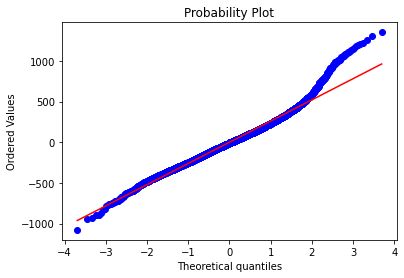

In [50]:
pred = model.predict(df_new)
res = model.resid
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

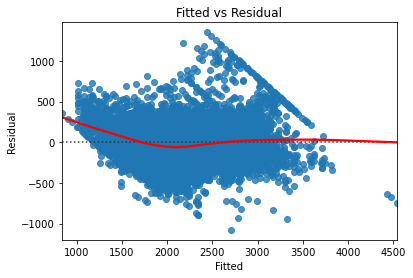

In [51]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = df_new.price, lowess = True,line_kws=dict(color="r"))
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

* The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.
* The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.
* Some residuals "stands out" from the basic random pattern of residuals. This suggests that there are some outliers.

Splitting the dataset to check the rmse values for both the test and train dataset which will help us to understand how well the model works.

In [52]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_new, test_size = 0.3, random_state =457) 

In [53]:
# preparing the model on train data 
model_train = smf.ols('price ~ speed+hd +ram+screen +ads + trend + cd_yes + multi_yes+ premium_yes', data = df_train).fit()

In [54]:
# prediction on test data set 
test_pred = model_train.predict(df_test)

# test residual values 
test_resid = test_pred - df_test.price
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

263.6232063511534

In [55]:
# train_data prediction
train_pred = model_train.predict(df_train)

# train residual values 
train_resid  = train_pred - df_train.price
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

263.6772740828667

__LASSO & RIDGE REGRESSION__

Importing the library required for Lasso & Ridge Regression. 

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

Declaring the parameters to be evaluated using gridsearchCV

In [57]:
parameters = {'alpha': [ 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}


__Lasso Regeression__

Declaring the lasso object

In [58]:
lasso = Lasso()

Using the gridsearchcv to find the best parameters from the declared parameters and creating the lasso object 

In [59]:
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5)

Fitting the Lasso object on the train dataset.

In [60]:
lasso_reg.fit(df_train.iloc[:,1:], df_train.price)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='r2')

Checking the best parameter

In [61]:
lasso_reg.best_params_

{'alpha': 1e-10}

__Adjusted R-square__

In [63]:
lasso_reg.score(df_train.iloc[:,1:], df_train.price)

0.7806718283176002

__Test Dataset__

Using the lasso object to predict the output using the independent variables.

In [64]:
lasso_predtest = lasso_reg.predict(df_test.iloc[:,1:])
# RMSE
np.sqrt(np.mean((lasso_predtest - df_test.price)**2))

263.6232063511707

__Train Dataset__

In [65]:
lasso_predtrain = lasso_reg.predict(df_train.iloc[:,1:])
# RMSE
np.sqrt(np.mean((lasso_predtrain - df_train.price)**2))

263.67727408286675

__Ridge Regeression__

Declaring the ridge object

In [66]:
ridge = Ridge()

Using the gridsearchcv to find the best parameters from the declared parameters and creating the ridge object 

In [67]:
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'r2', cv = 5)

Fitting the ridge object on the train dataset.

In [68]:
ridge_reg.fit(df_train.iloc[:,1:], df_train.price)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='r2')

Checking the best parameter

In [69]:
ridge_reg.best_params_

{'alpha': 0.01}

__Adjusted R-square__

In [70]:
ridge_reg.score(df_train.iloc[:,1:], df_train.price)

0.7806718282641614

__Test Dataset__

Using the ridge object to predict the output using the independent variables.

In [71]:
ridge_predtest = ridge_reg.predict(df_test.iloc[:,1:])
# RMSE
np.sqrt(np.mean((ridge_predtest - df_test.price)**2))

263.62336580014437

__Train Dataset__

In [72]:
ridge_predtrain = ridge_reg.predict(df_train.iloc[:,1:])
# RMSE
np.sqrt(np.mean((ridge_predtrain - df_train.price)**2))

263.67727411498896

__ElasticNet Regeression__

Declaring the elasticnet object

In [73]:
elastic = ElasticNet()

Using the gridsearchcv to find the best parameters from the declared parameters and creating the elasticnet object 

In [74]:
elastic_reg = GridSearchCV(elastic, parameters, scoring = 'r2', cv = 5)

Fitting the elasticnet object on the train dataset.

In [75]:
elastic_reg.fit(df_train.iloc[:,1:], df_train.price)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='r2')

Checking the best parameter

In [76]:
elastic_reg.best_params_

{'alpha': 0.0001}

__Adjusted R-square__

In [77]:
elastic_reg.score(df_train.iloc[:,1:], df_train.price)

0.7806718025752775

__Test Dataset__

Using the elasticnet object to predict the output using the independent variables.

In [78]:
elastic_predtest = elastic_reg.predict(df_test.iloc[:,1:])
# RMSE
np.sqrt(np.mean((elastic_predtest - df_test.price)**2))

263.62671892404086

__Train Dataset__

In [79]:
elastic_predtrain = elastic_reg.predict(df_train.iloc[:,1:])
# RMSE
np.sqrt(np.mean((elastic_predtrain - df_train.price)**2))

263.6772895566322

| **slno** |      **Model**     | **Adjusted R-square**  | **Train Data RMSE** | **Test Data RMSE** |
|:--------:|:-------------------|:-----------------------|:--------------------|:-------------------|
| 1        | Base Model         | 0.78                   | 263.68             | 263.62       |
| 2        | Lasso Model        | 0.78                   | 263.68             | 263.62       |
| 3        | Ridge Model        | 0.78                   | 263.68             | 263.62       |
| 4        | ElasticNet Model   | 0.78                   | 263.68             | 263.63     |


### CONCLUSION

From the above details we can see that the base model is giving the same r-square and rmse values as the lasso, ridge and elasticnet models. so for this dataset Base model is ideal.